# Coupled oscillators

We start with two coupled oscillators described by following -

$$
\frac{d^2x_1}{dt^2} = -\omega_1^2 x_1 + \lambda_1 x_1x_2
$$
$$
\frac{d^2x_2}{dt^2} = -\omega_2^2 x_2 + \lambda_2 x_1x_2
$$

or, equivalently

$$
\frac{dx_1}{dt} = v_1\qquad\frac{dv_1}{dt} = -\omega_1^2 x_1 + \lambda_1 x_1x_2\qquad
\frac{dx_2}{dt} = v_2\qquad\frac{dv_2}{dt} = -\omega_2^2 x_2 + \lambda_2 x_1x_2
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
class osc:
    def __init__(self, freq, damping, coupling):
        assert len(freq) == len(coupling)
        self.N = len(freq)
        self._freq = np.asarray(freq)
        self._coupling = np.asarray(coupling)
        self._damping = np.asarray(damping)
    #
    def _get_freq(self):
        return self._freq
    def _set_freq(self, freq):
        self._freq[:] = freq
    freq = property(fget=_get_freq, fset=_set_freq, doc='frequencies of the oscillator')
    def _get_damp(self):
        return self._damping
    def _set_damp(self, damping):
        self._damping[:] = damping
    damping = property(fget=_get_damp, fset=_set_damp, doc='damping of the oscillator')
    def _get_coup(self):
        return self._coupling
    def _set_coup(self, coupling):
        self._coupling[:] = coupling
    coupling = property(fget=_get_coup, fset=_set_coup, doc='coupling of the oscillator')
    def __call__(self, t: float, x: np.ndarray):
        pos, vel = x[::2], x[1::2]
        f = np.zeros(2 * self.N)
        f[1::2] = -self.freq**2 * pos + self.coupling * np.prod(pos) - self.damping * vel
        f[0::2] = vel
        return f
    #

"""
class osc:
    def __init__(self, freq, coupling):
        assert len(freq) == len(coupling)
        self.N = len(freq)
        self._freq = np.asarray(freq)
        self._coupling = np.asarray(coupling)
    #
    @property
    def freq(self): return self._freq
    @freq.setter
    def freq(self, freq): self._freq[:] = freq
    @property
    def coupling(self): return self._coupling
    @coupling.setter
    def coupling(self, coupling): self._coupling[:] = coupling
    def __call__(self, t, x: np.ndarray):
        pos, vel = x[::2], x[1::2]
        f = np.zeros(2 * self.N)
        f[::2] = -self.freq**2 * pos + self.coupling * np.prod(pos)
        f[1::2] = vel
        return f
    #
"""


'\nclass osc:\n    def __init__(self, freq, coupling):\n        assert len(freq) == len(coupling)\n        self.N = len(freq)\n        self._freq = np.asarray(freq)\n        self._coupling = np.asarray(coupling)\n    #\n    @property\n    def freq(self): return self._freq\n    @freq.setter\n    def freq(self, freq): self._freq[:] = freq\n    @property\n    def coupling(self): return self._coupling\n    @coupling.setter\n    def coupling(self, coupling): self._coupling[:] = coupling\n    def __call__(self, t, x: np.ndarray):\n        pos, vel = x[::2], x[1::2]\n        f = np.zeros(2 * self.N)\n        f[::2] = -self.freq**2 * pos + self.coupling * np.prod(pos)\n        f[1::2] = vel\n        return f\n    #\n'

In [23]:
# number of oscillators
N_osc = 10

# initial condition
xinit = np.random.random(N_osc) * 3
vinit = np.random.random(N_osc) * 2
xinit = 2 * xinit - 1
vinit = 2 * vinit - 1
x_init = np.zeros(2 * N_osc)
x_init[0::2] = xinit
x_init[1::2] = vinit

frequencies = np.random.random(N_osc) * 1.5
dampings = np.random.random(N_osc) * 0.6
couplings = np.random.random(N_osc) * 0.01




  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 734
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x14d2b1ee1b80>
   status: 0
  success: True
        t: array([0.00000000e+00, 3.77003685e-03, 7.54007370e-03, ...,
       1.13089795e+02, 1.13093565e+02, 1.13097336e+02])
 t_events: None
        y: array([[ 2.87261181e+00,  2.86910721e+00,  2.86556340e+00, ...,
        -1.14674981e-11, -1.14473012e-11, -1.14269587e-11],
       [-9.24385278e-01, -9.34799764e-01, -9.45181169e-01, ...,
         5.33785117e-12,  5.37655152e-12,  5.41509947e-12],
       [-8.60748749e-01, -8.64254318e-01, -8.67736513e-01, ...,
         1.00809153e-12,  1.00700853e-12,  1.00590789e-12],
       ...,
       [-6.77830408e-01, -6.78634564e-01, -6.79434318e-01, ...,
        -4.44403404e-13, -4.43108000e-13, -4.41813301e-13],
       [-6.69873929e-01, -6.69691152e-01, -6.69504550e-01, ...,
         3.66628111e-03,  3.66896670e-03,  3

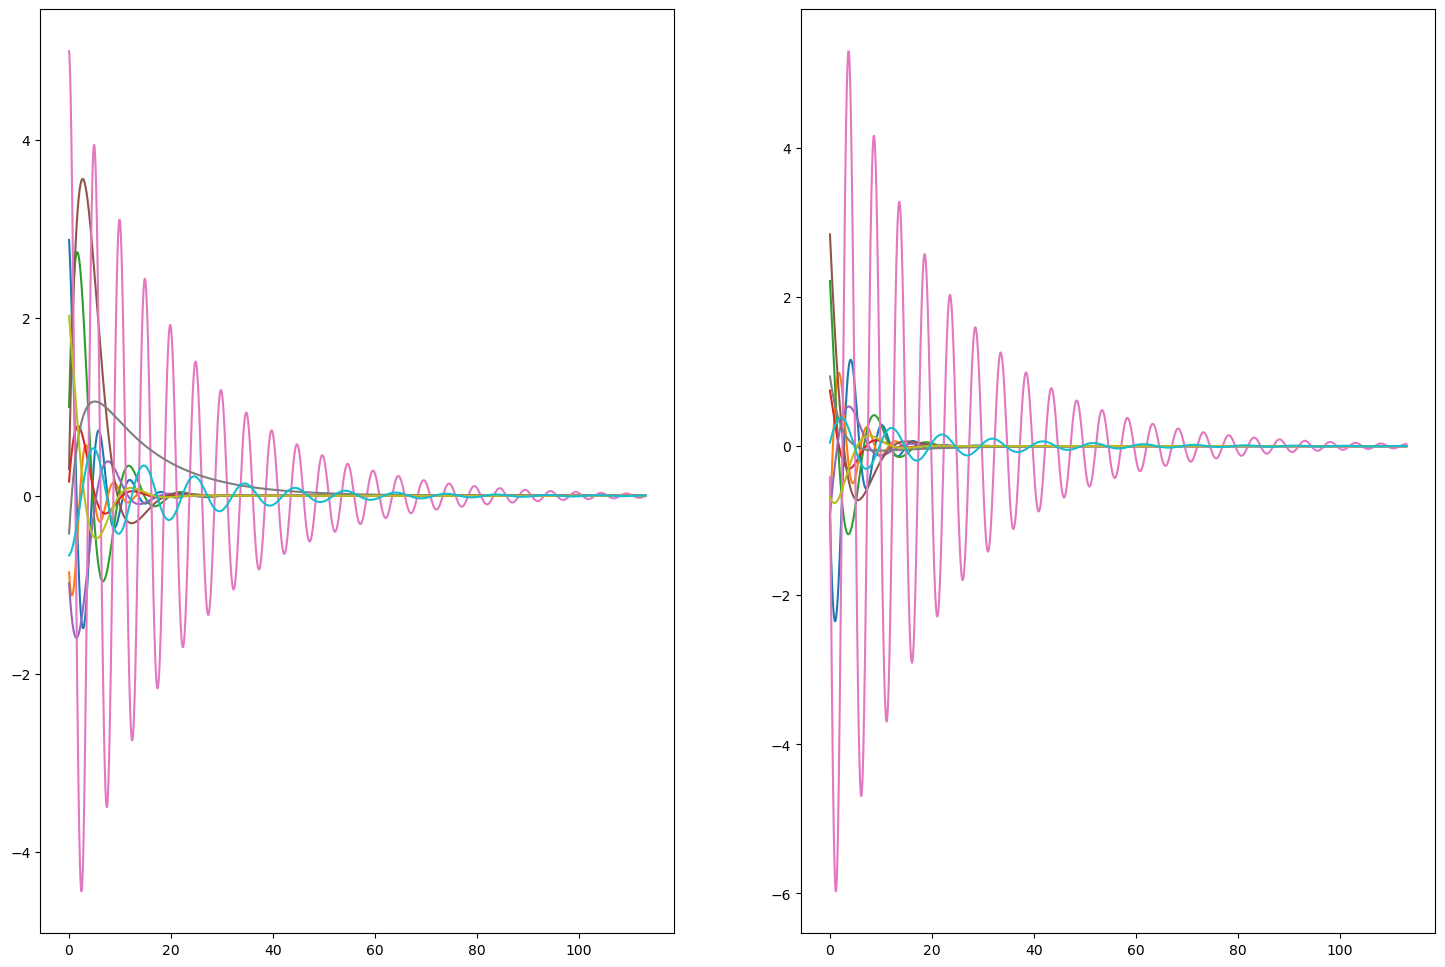

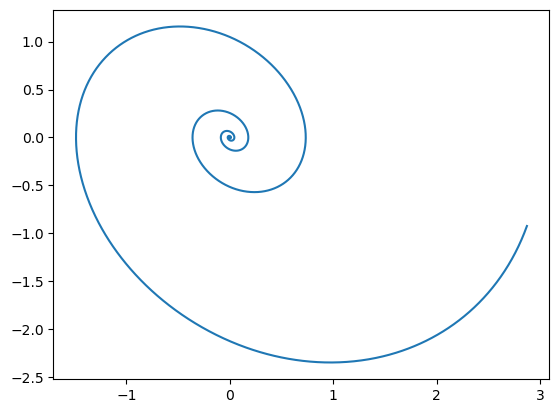

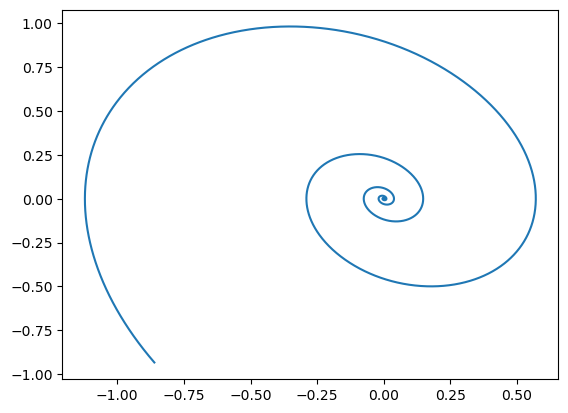

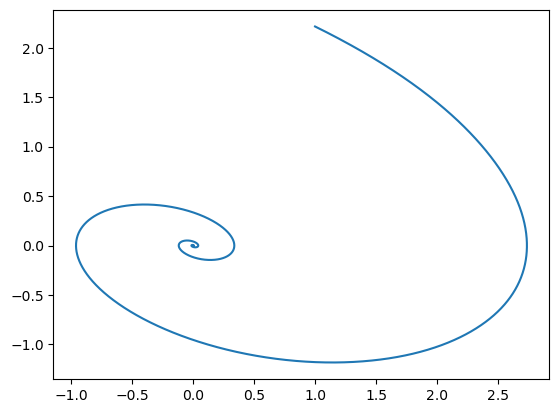

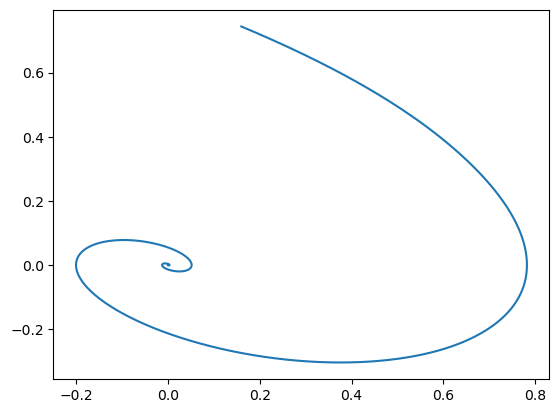

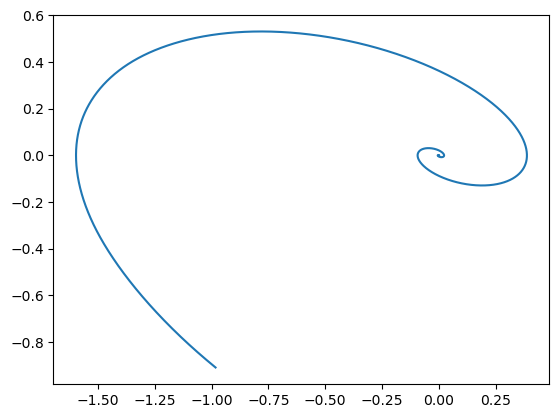

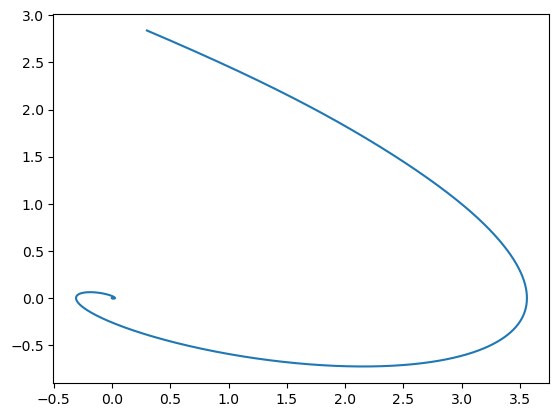

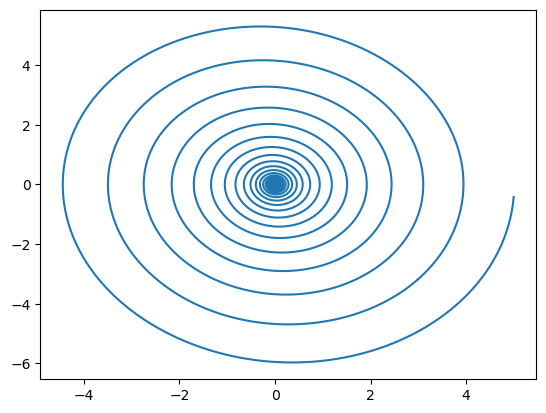

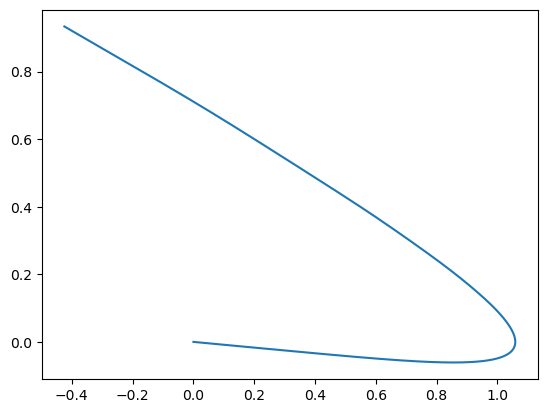

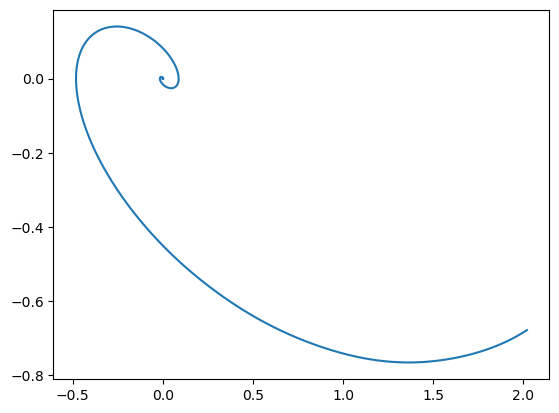

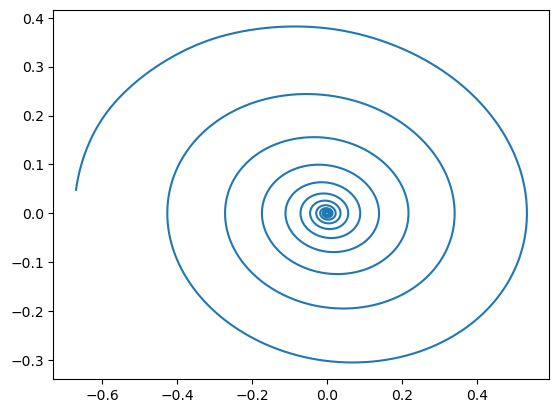

'\nfor i, y1 in enumerate(yy[::2]):\n    for j, y2 in enumerate(yy[::2]):\n        plt.plot(y1, y2)\n        plt.show()\n'

In [25]:
# x_init = np.array([-0.3, 3, 0.3, 3]) # x1, v1, x2, 
func = osc(freq=frequencies, damping=dampings, coupling=couplings)

t_start, t_finish = 0, 36 * np.pi
t = np.linspace(t_start, t_finish, 30000)

res = solve_ivp(func, t_span=(t_start, t_finish), t_eval=t, y0=x_init, dense_output=True)
tt, yy = res['t'], res['y']
print(res)
fig, ax = plt.subplots(1, 2, figsize=(18,12))
for y in yy[0::2]:
    ax[0].plot(tt, y)
for y in yy[1::2]:
    ax[1].plot(tt, y)
#
plt.show()

for y1, y2 in zip(yy[0::2], yy[1::2]):
    plt.plot(y1, y2)
    plt.show()

"""
for i, y1 in enumerate(yy[::2]):
    for j, y2 in enumerate(yy[::2]):
        plt.plot(y1, y2)
        plt.show()
"""

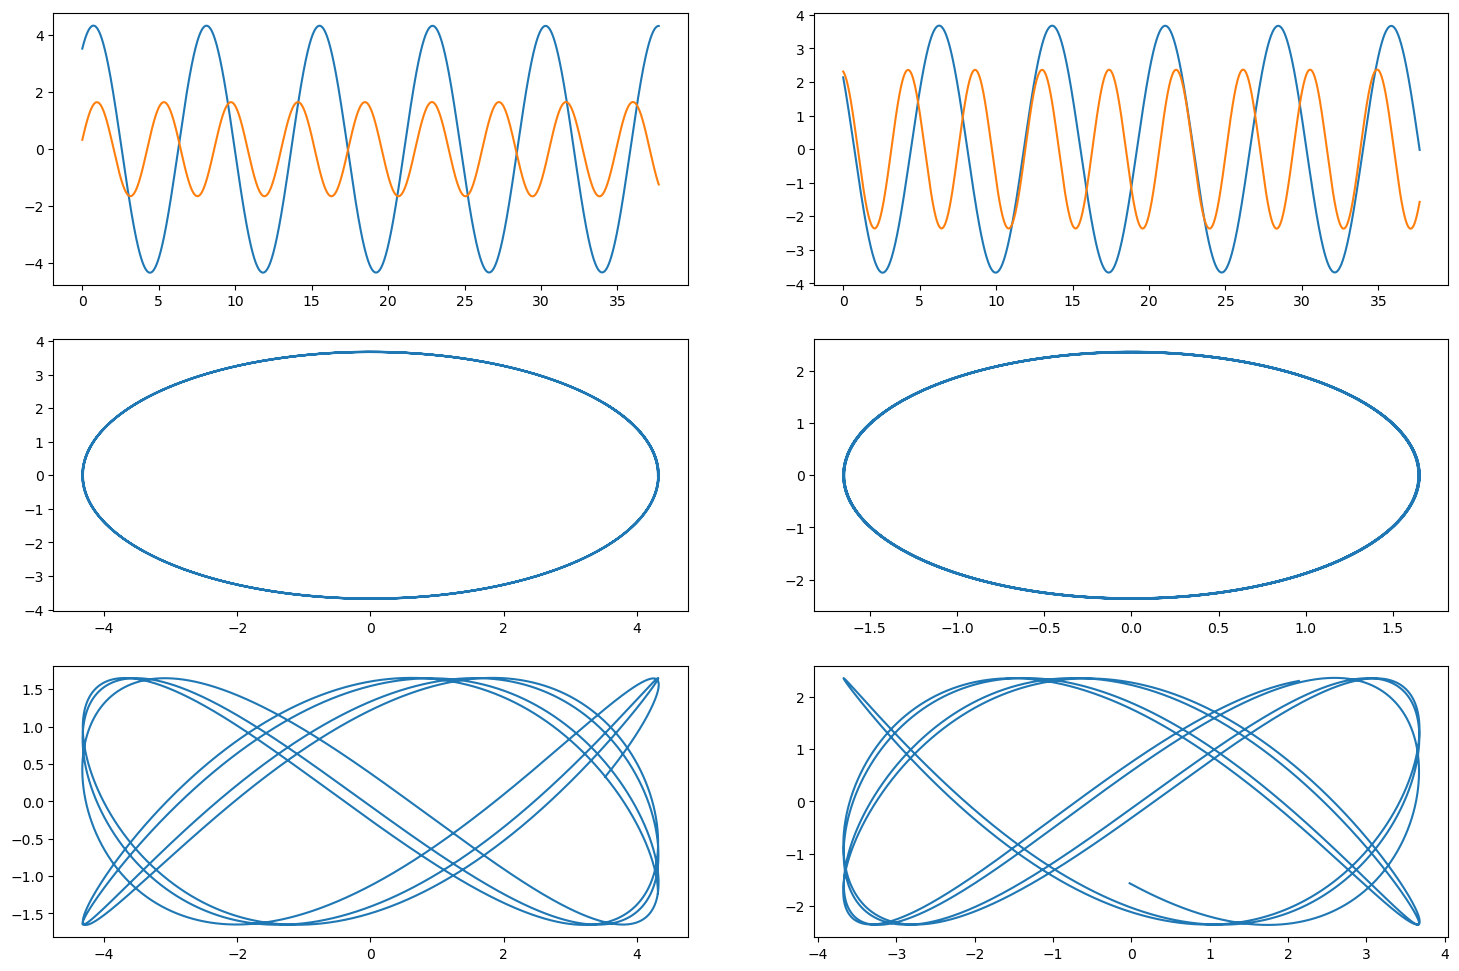

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(18,12))
ax.shape = (6,)
ax[0].plot(tt, y[0], tt, y[2])
ax[1].plot(tt, y[1], tt, y[3])
ax[2].plot(y[0], y[1])
ax[3].plot(y[2], y[3])
ax[4].plot(y[0], y[2])
ax[5].plot(y[1], y[3])
plt.show()